In [1]:
from mountain_car_stds import *
import rl_lib
from rl_lib.agents.q_learning import DNNQLearningAgent
import tensorflow as tf

class MCAgent(DNNQLearningAgent):

    def __init__(self):
        super().__init__(state_dims=2,
                         actions_num=3,
                         hidden_layers=[64, 32],
                         activations=[tf.nn.relu, tf.nn.relu],
                         drop_out=.3,
                         lr=1e-1,
                         mapper=rl_lib.utils.UnitMapper(state_low, state_high),
                         epsilon_factor=1)
        
agent = MCAgent()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [2]:
df = run(agent, 1000, verbose=1)

Run 1000 episodes in 393.43 seconds. Average reward -244.19985213337722


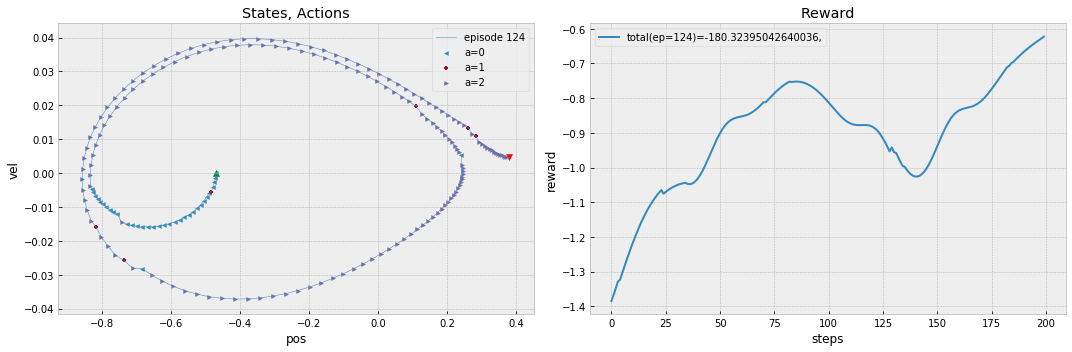

In [3]:
show_episode(df, episode=-1)

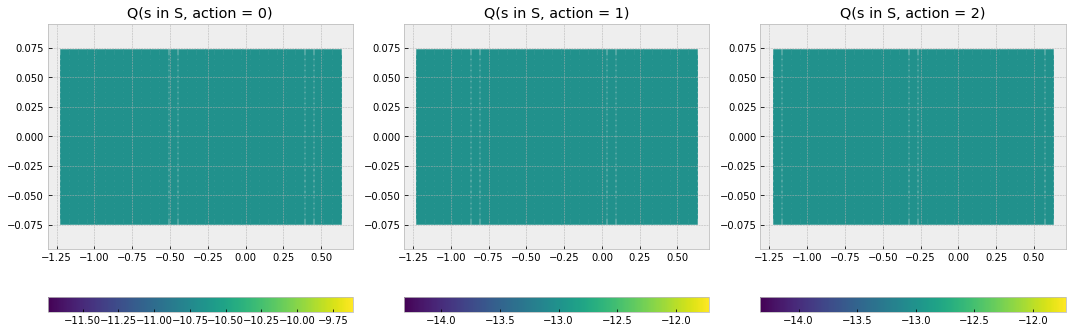

In [4]:
show_Q(agent)

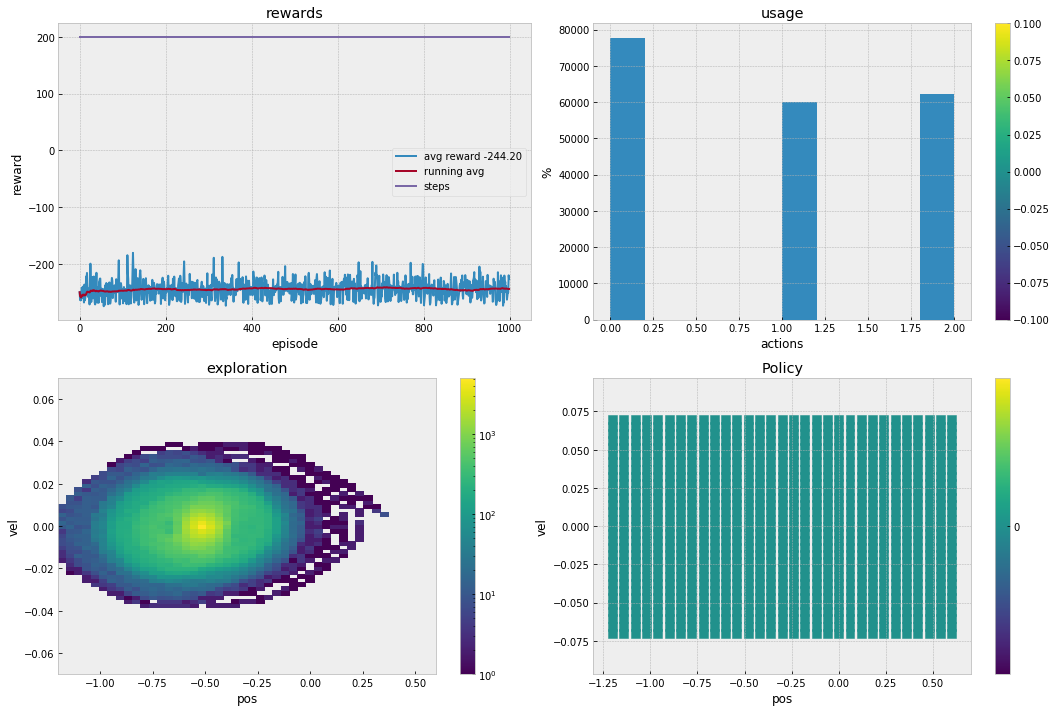

In [5]:
show_progress(df, agent)

# DNN Q-Learning agent was unable to solve that problem

The only difference with the RBF Q-Learning agent is the type of the function approximator. So lets check the ability of the NN to approximate the Q function.

(961,)
(961, 2) (961, 1)
(961,)


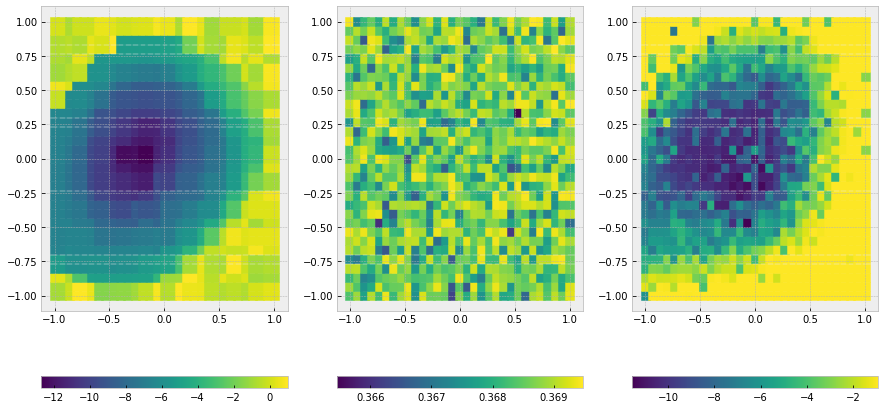

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

q = pd.read_csv('Q.csv')
q.head()

states = np.array(q[['state1', 'state2']])
action1, action2, action3 = np.array(q['action1']), np.array(q['action2']), np.array(q['action3'])

scale = state_high-state_low
def scaler(state):
    scaled = 2*(state-state_low)/scale-1
    return scaled
norm_states = np.array([scaler(s) for s in states])

x, y = norm_states, np.reshape(action1, (-1, 1))
from rl_lib.utils.nets import *
net = FullyConnectedDNN(2,
                        1,
                        hidden_layers=[64, 32],
                        activations=[tf.nn.relu, tf.nn.relu],
                        drop_out=.1,
                        lr=1e-2)

plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plot(x, y[:, 0])
plt.colorbar(orientation='horizontal')

pred = np.array([net.predict(xy) for xy in x])[:, 0]
print(pred.shape)
plt.subplot(1, 3, 2)
plot(x, pred)
plt.colorbar(orientation='horizontal')

print(x.shape, y.shape)
for i in np.random.randint(y.shape[0], size=10000):
    net.partial_fit(np.array(x[i]), np.array(y[i]))
    
pred = np.array([net.predict(xy) for xy in x])[:, 0]
print(pred.shape)
plt.subplot(1, 3, 3)
plot(x, pred)
plt.colorbar(orientation='horizontal')

As we can see the deep neural network has the ability to approximate the Q function. That means that the problem lies on the training procedure. 

Maybe if we use some batching technique (such as minibatching) in order to train the NN more efficiently would solve the problem, but it is not part of this exercise. 